# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #Variables were taken from the API webpage
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | al jawf
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | miranda
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | jayapura
Processing Record 9 of Set 1 | barcelos
Processing Record 10 of Set 1 | west bay
Processing Record 11 of Set 1 | waddan
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | garoowe
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | taoudenni
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | holualoa
Processing Record 22 of Set 1 | kristiansu

City not found. Skipping...
Processing Record 40 of Set 4 | shenandoah
Processing Record 41 of Set 4 | zaio
Processing Record 42 of Set 4 | margate
Processing Record 43 of Set 4 | sturgeon bay
Processing Record 44 of Set 4 | buka
Processing Record 45 of Set 4 | tazovsky
Processing Record 46 of Set 4 | xam nua
Processing Record 47 of Set 4 | al jubayl
Processing Record 48 of Set 4 | alenquer
Processing Record 49 of Set 4 | naze
Processing Record 0 of Set 5 | paradip garh
Processing Record 1 of Set 5 | nizhniy lomov
Processing Record 2 of Set 5 | lhokseumawe
Processing Record 3 of Set 5 | tsiombe
Processing Record 4 of Set 5 | waingapu
Processing Record 5 of Set 5 | nouadhibou
Processing Record 6 of Set 5 | sittwe
Processing Record 7 of Set 5 | las lomitas
Processing Record 8 of Set 5 | kaa-khem
Processing Record 9 of Set 5 | cockburn town
Processing Record 10 of Set 5 | santo antonio do ica
Processing Record 11 of Set 5 | beyneu
Processing Record 12 of Set 5 | puerto baquerizo moreno
Pr

Processing Record 25 of Set 8 | rye
Processing Record 26 of Set 8 | massakory
Processing Record 27 of Set 8 | kenora
Processing Record 28 of Set 8 | weno
Processing Record 29 of Set 8 | rongelap
Processing Record 30 of Set 8 | newman
Processing Record 31 of Set 8 | lodwar
Processing Record 32 of Set 8 | puerto lempira
Processing Record 33 of Set 8 | francisco sa
Processing Record 34 of Set 8 | saint-pierre
Processing Record 35 of Set 8 | lu-uk
Processing Record 36 of Set 8 | bekondo
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | valparaiso
Processing Record 39 of Set 8 | cherokee
Processing Record 40 of Set 8 | new norfolk
Processing Record 41 of Set 8 | maloye ganyushkino
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | kili
Processing Record 44 of Set 8 | ambon
Processing Record 45 of Set 8 | blair
Processing Record 46 of Set 8 | enshi
Processing Record 47 of Set 8 | yangor
City not found. Skipping...
Processing Record 48 of Set 8 |

Processing Record 17 of Set 12 | barranca
Processing Record 18 of Set 12 | guarapari
Processing Record 19 of Set 12 | yashkul'
Processing Record 20 of Set 12 | alice springs
Processing Record 21 of Set 12 | santa ana
Processing Record 22 of Set 12 | al khawr
Processing Record 23 of Set 12 | takaungu
Processing Record 24 of Set 12 | belyy yar
Processing Record 25 of Set 12 | guatire
Processing Record 26 of Set 12 | hue
Processing Record 27 of Set 12 | karaidel'
Processing Record 28 of Set 12 | dostpur
Processing Record 29 of Set 12 | toga village
City not found. Skipping...
Processing Record 30 of Set 12 | alotau
City not found. Skipping...
Processing Record 31 of Set 12 | sierra grande
Processing Record 32 of Set 12 | marshfield
Processing Record 33 of Set 12 | tanggu
Processing Record 34 of Set 12 | singkil
Processing Record 35 of Set 12 | new philadelphia
Processing Record 36 of Set 12 | guiglo
Processing Record 37 of Set 12 | willmar
Processing Record 38 of Set 12 | lenino
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,al jawf,29.5000,38.7500,33.47,14,9,5.19,SA,1690140525
1,olonkinbyen,70.9221,-8.7187,4.88,88,95,4.82,SJ,1690140525
2,miranda,3.2499,-76.2281,30.07,41,67,1.09,CO,1690140525
3,edinburgh of the seven seas,-37.0676,-12.3116,13.67,79,36,10.87,SH,1690140525
4,puerto natales,-51.7236,-72.4875,1.81,82,7,0.87,CL,1690140525


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\gurpa\Documents\GitHub\Python_API_Challenge\output_data\cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\gurpa\Documents\GitHub\Python_API_Challenge\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kavaratti,10.5669,72.6420,28.18,83,100,8.91,IN,1690137068
1,albany,42.6001,-73.9662,30.02,50,41,0.89,US,1690137002
2,port-aux-francais,-49.3500,70.2167,6.20,84,50,17.32,TF,1690137040
3,nova sintra,14.8667,-24.7167,22.97,77,96,5.05,CV,1690137097
4,wailua homesteads,22.0669,-159.3780,25.44,90,100,6.69,US,1690137046


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

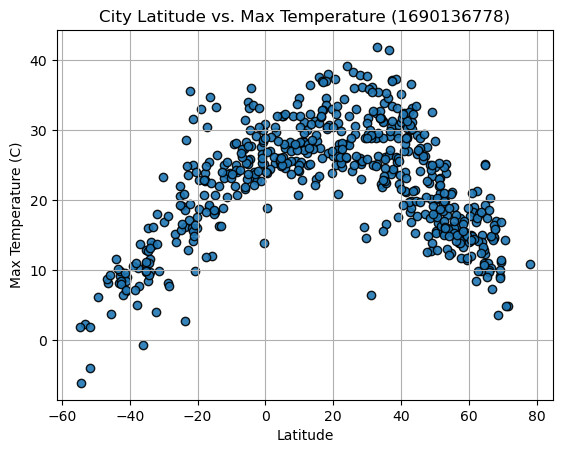

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.9, edgecolors='k')

# Incorporate the other graph properties
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\gurpa\Documents\GitHub\Python_API_Challenge\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

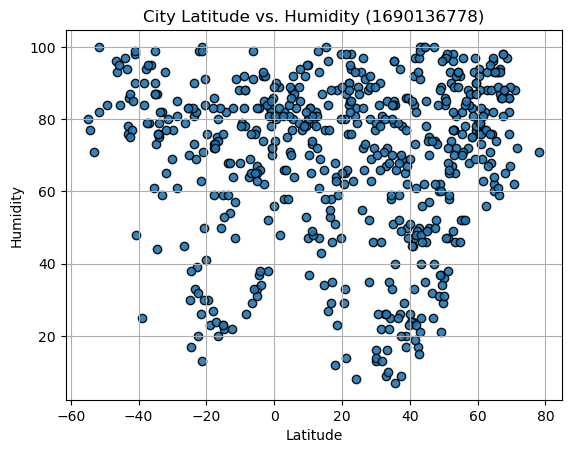

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.9, edgecolors="k")

# Incorporate the other graph properties
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\gurpa\Documents\GitHub\Python_API_Challenge\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

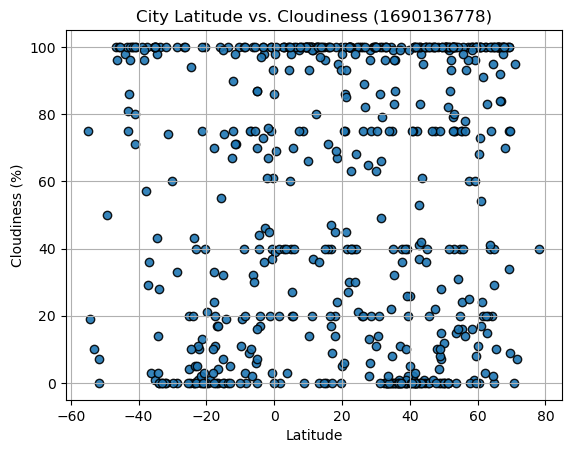

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.9, edgecolors="k")

# Incorporate the other graph properties
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\gurpa\Documents\GitHub\Python_API_Challenge\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

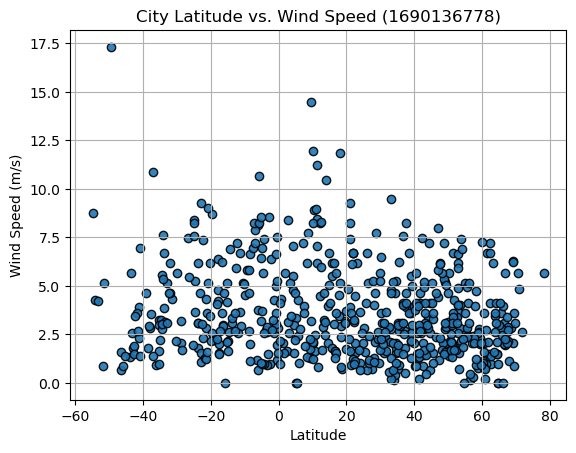

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.9, edgecolors="k")


# Incorporate the other graph properties
date=city_data_df["Date"].min()
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig(r"C:\Users\gurpa\Documents\GitHub\Python_API_Challenge\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kavaratti,10.5669,72.6420,28.18,83,100,8.91,IN,1690137068
1,albany,42.6001,-73.9662,30.02,50,41,0.89,US,1690137002
3,nova sintra,14.8667,-24.7167,22.97,77,96,5.05,CV,1690137097
4,wailua homesteads,22.0669,-159.3780,25.44,90,100,6.69,US,1690137046
5,baalbek,34.0058,36.2181,22.36,35,0,0.17,LB,1690137434


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,6.20,84,50,17.32,TF,1690137040
9,nova xavantina,-14.6667,-52.3500,33.28,22,0,2.65,BR,1690137435
10,grytviken,-54.2811,-36.5092,-6.12,77,19,4.27,GS,1690137040
11,constitucion,-35.3333,-72.4167,12.84,61,100,3.22,CL,1690137129
12,bairnsdale,-37.8333,147.6167,5.03,94,57,2.84,AU,1690137435


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.45031358291039275


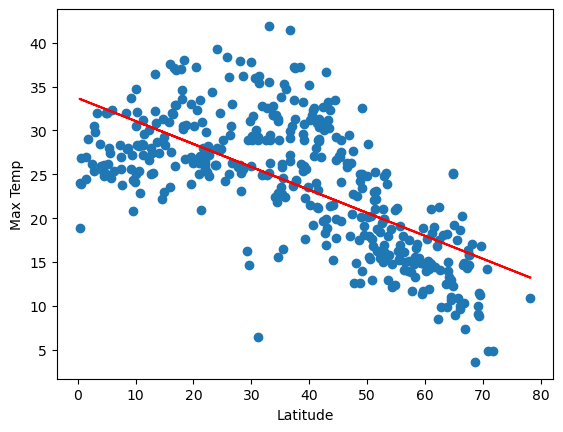

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7000172188778637


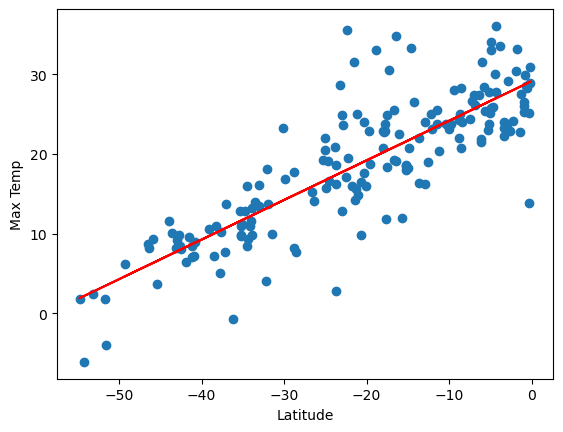

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both plot graphs, there is a strong linear relationship between Latitude and Max Temp. We can see that as the latitude approaches zero, the max temp rises in both situations. On the other hand, it becomes cooler as the latitude moves away from zero. Hence, we can conclude that the latitude position does determine what the max temp would be in that position.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.006377619327713229


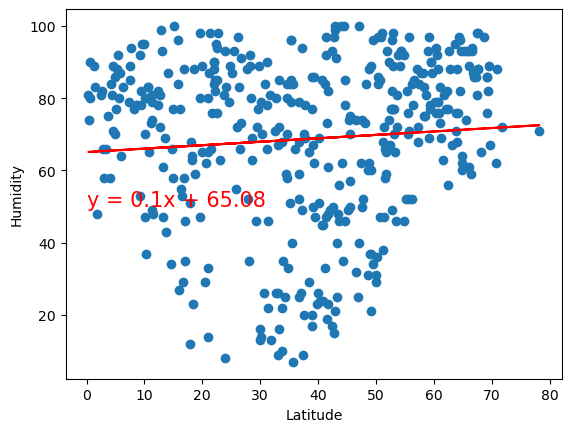

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.055667705985244724


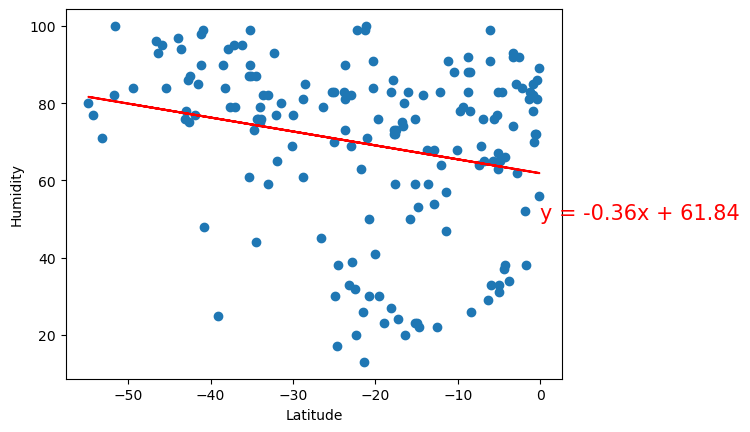

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is no relationship between latitude and humidity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.002474411593684126


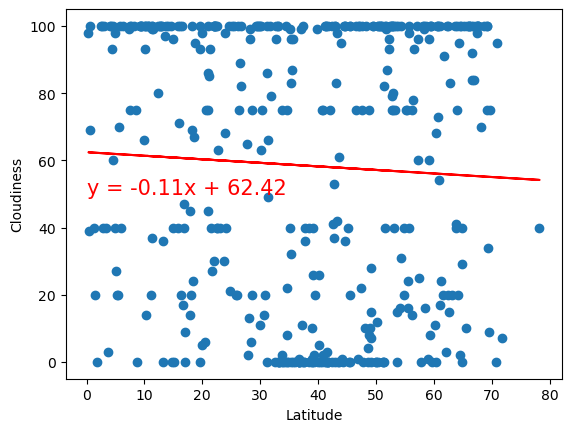

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.013742353133392313


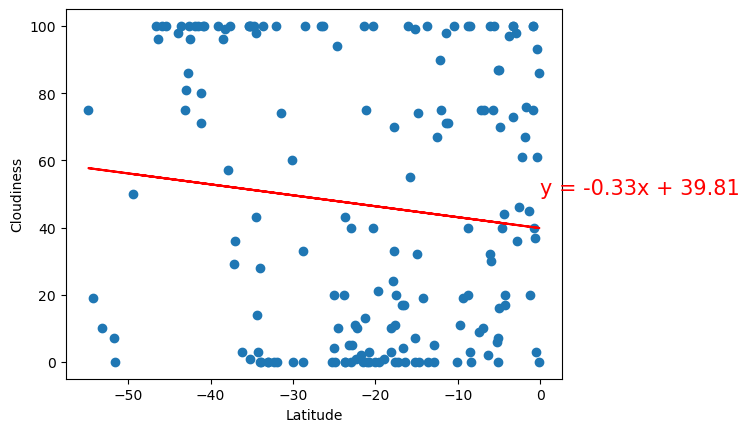

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is no relationship between latitude and cloudiness either.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.031749565026847275


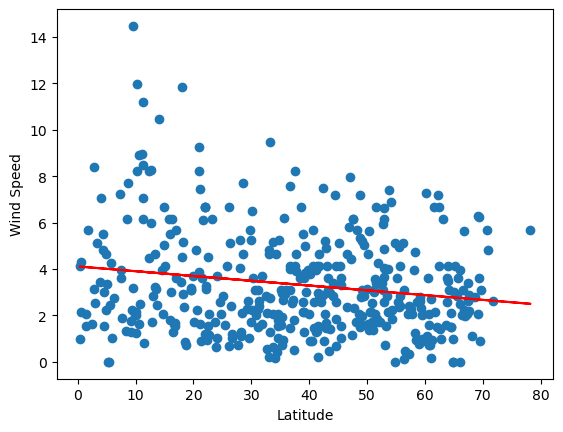

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0023856727356461644


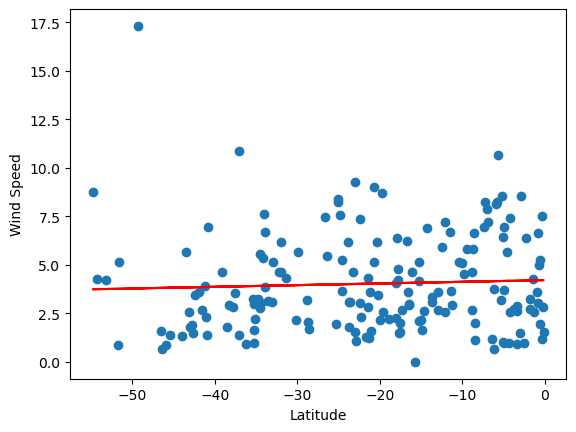

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is no relationship between latitude and wind speed as well.